In [ ]:
%%time
import numpy as np

x=np.ones((90000,90000))
print(x)



> **Tu sesión falló porque se usó toda la RAM disponible.**



# **Pero ahora implementamos con dask**

El Dask Array implementa un subconjunto matrices pequeñas. Cada Matriz es una interfaz NumPy ndarray

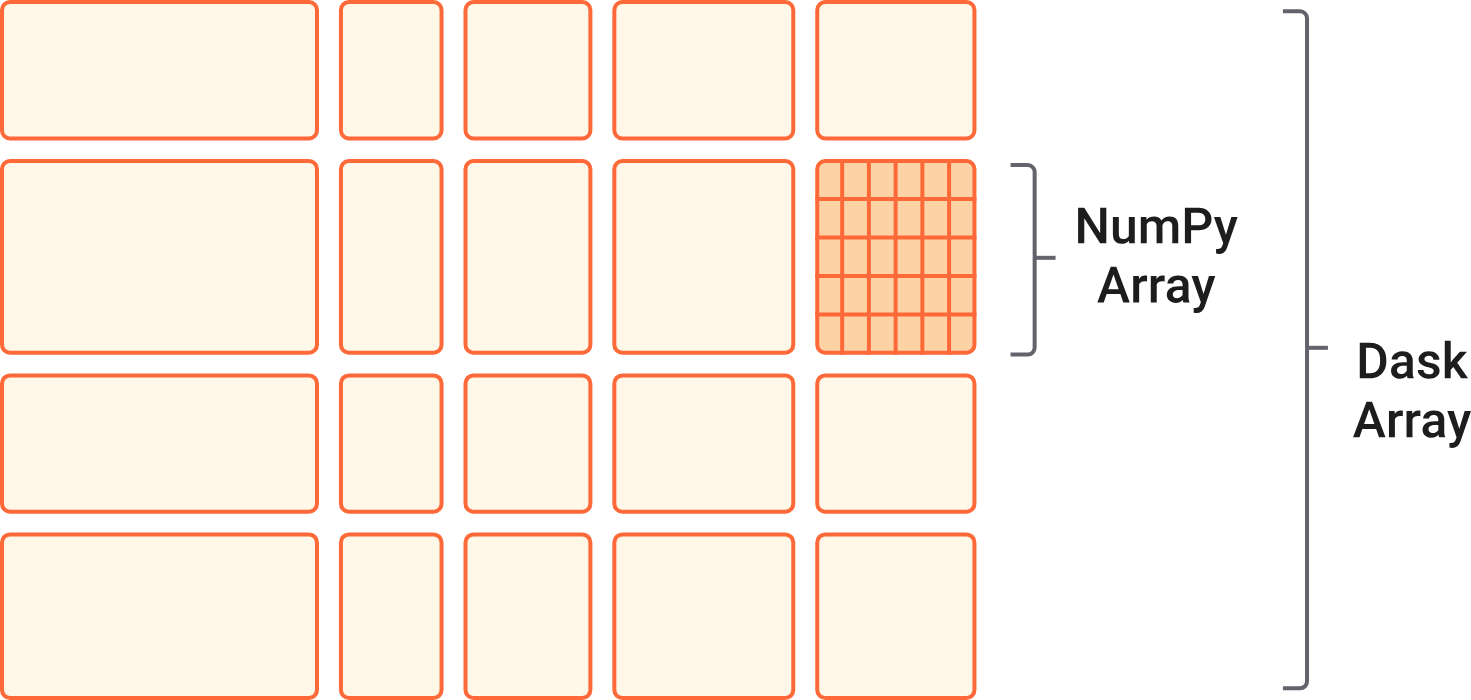

In [1]:
%%time
import dask.array as da
x=da.ones((90000,90000),chuncks=(9000,9000))
x

CPU times: user 667 ms, sys: 208 ms, total: 875 ms
Wall time: 1.89 s


dask.array<ones_like, shape=(90000, 90000), dtype=float64, chunksize=(4096, 4096), chunktype=numpy.ndarray>

Dask puede manejar datos que no caben en la memoria de una sola máquina dividiendo el array en bloques más pequeños (llamados "chunks"). Estos chunks pueden ser procesados en paralelo, lo que puede acelerar la creación y el manejo de conjuntos de datos grandes.
Al usar la interfaz de Numpy, Dask permite una fácil transición y una sintaxis familiar para los usuarios de Numpy.

# **Ahora utilizaremos sklearn y Dask**

In [1]:
%%time
import numpy as np
x=np.random.random((10000,10000))
print(x)

[[0.11815776 0.07585821 0.3958317  ... 0.13232568 0.39806741 0.36618326]
 [0.67665361 0.99305711 0.77466265 ... 0.85159745 0.69999068 0.13447526]
 [0.84758998 0.59349995 0.81860371 ... 0.98402881 0.46858024 0.60539627]
 ...
 [0.47290931 0.79349751 0.12969023 ... 0.92407391 0.25839759 0.73665277]
 [0.00731414 0.10741624 0.76523586 ... 0.78008871 0.90719167 0.35510643]
 [0.93103984 0.31666104 0.28467333 ... 0.93549579 0.06050559 0.21267634]]
CPU times: user 1.52 s, sys: 353 ms, total: 1.87 s
Wall time: 2.99 s


In [2]:
%%time
import dask.array as da

#usamos datos aleatoreos
x_da=da.random.random((10000,10000),chunks=(1000,1000))
x_da

CPU times: user 794 ms, sys: 105 ms, total: 898 ms
Wall time: 3.21 s


dask.array<random_sample, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

**Discusión:** Dask puede ser más rápido que scikit-learn al crear y manejar grandes conjuntos de datos debido a su capacidad para dividir el array en pequeñas partes que pueden ser procesadas en paralelo. Dask usa el mismo API que Numpy, lo que facilita la transición y el manejo de datos de manera distribuida.

In [ ]:
pip install dask_ml

In [4]:
%%time
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

CPU times: user 1.95 s, sys: 616 ms, total: 2.57 s
Wall time: 3.44 s


array([[-1.31392056, -1.45738643, -0.36737462, ..., -1.26614489,
        -0.36014027, -0.45428998],
       [ 0.60676931,  1.69643768,  0.94761531, ...,  1.2137938 ,
         0.6845598 , -1.25813041],
       [ 1.19462641,  0.32254482,  1.10014259, ...,  1.67039684,
        -0.11615526,  0.37558685],
       ...,
       [-0.09391559,  1.0102442 , -1.29119925, ...,  1.46368153,
        -0.84341895,  0.83094138],
       [-1.69511626, -1.3488729 ,  0.91489326, ...,  0.96724264,
         1.40150653, -0.49271767],
       [ 1.48161386, -0.62937653, -0.7532252 , ...,  1.50306242,
        -1.52815517, -0.98683556]])

In [5]:
#Estandarizar los datos en Dask
%%time
from dask_ml.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x_da.compute())
x_scaled


CPU times: user 8.76 s, sys: 2.42 s, total: 11.2 s
Wall time: 11.3 s


array([[-0.85468155,  1.31951262,  0.52214145, ...,  0.67667921,
        -0.42213712,  0.04237948],
       [-0.94342661,  1.24719016, -1.21950785, ...,  1.18573065,
         0.16229944,  0.91799266],
       [ 0.04722615,  1.28755395,  0.6933523 , ..., -0.73046515,
         1.48513836, -1.37900593],
       ...,
       [-1.35573904, -0.37249858, -0.67937909, ..., -0.67476136,
         1.06669487,  0.64069325],
       [ 0.26641361, -0.9935301 ,  0.04397635, ..., -0.25562789,
         1.48203974, -0.01585072],
       [ 0.66440388, -1.31309353, -0.39413366, ...,  0.86091747,
         0.89270265,  0.15093288]])

# **Distribuida - Dask**

In [6]:
pip install pyngrok

In [7]:
# Configurar ngrok con el authtoken: para poder observar el dashboard
from pyngrok import ngrok
ngrok.set_auth_token("2XJnyDWEa24eEZOHTI0d6HTLQpx_5mtXeCo5XA3WPwmt1TeWG")

In [8]:
from dask.distributed import Client
client = Client(n_workers=4)
client

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:43935
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:43909'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:41543'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:35527'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:43061'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:40411', name: 2, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:40411
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:38116
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:37323', name: 0, stat

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 12.67 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43935,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 12.67 GiB
Comm: tcp://127.0.0.1:37323,Total threads: 1
Dashboard: http://127.0.0.1:41581/status,Memory: 3.17 GiB
Nanny: tcp://127.0.0.1:43909,


In [9]:
# Obtener la URL del Dashboard
dashboard_link = client.dashboard_link
print("Dashboard link:", dashboard_link)

Dashboard link: http://127.0.0.1:8787/status


In [10]:
from pyngrok import ngrok

# Lista de tuneles
#ngrok.get_tunnels()

# Cerra si hay algun tunnel abierto para crear uno nuevo
#ngrok.disconnect(ngrok_tunnel.public_url) # Replace with the actual public URL if needed

# Conectar ngrok al puerto del dashboard
ngrok_tunnel = ngrok.connect(addr="127.0.0.1:8787")
print("ngrok tunnel:", ngrok_tunnel.public_url)

ngrok tunnel: https://fd4f-34-46-213-94.ngrok-free.app


In [11]:
%%time
import dask.array as da

#usamos datos aleatoreos
x_da=da.random.random((10000,10000),chunks=(1000,1000))
x_da

CPU times: user 8.69 ms, sys: 967 µs, total: 9.66 ms
Wall time: 16.8 ms


dask.array<random_sample, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

Reducimos la dimensionalidad

In [20]:
X_dask = x_da[:1000, :1000].rechunk((100, 100)) # Use .rechunk to specify new chunk sizes
X_dask

dask.array<rechunk-merge, shape=(1000, 1000), dtype=float64, chunksize=(100, 100), chunktype=numpy.ndarray>

In [22]:
#Estandarizar los datos en Dask
%%time
from dask_ml.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X_dask.compute())
x_scaled


CPU times: user 764 ms, sys: 93.5 ms, total: 857 ms
Wall time: 2.36 s


array([[-1.30535084,  1.68962795,  1.05028551, ...,  1.48819102,
         0.52685511, -1.68092759],
       [-0.67987946,  1.36862316, -0.1144152 , ..., -0.3399006 ,
         0.01676077, -0.92409488],
       [-0.25701848, -0.70071481, -0.85244337, ..., -1.21050927,
         0.40018467, -0.02321986],
       ...,
       [-1.55479734, -0.97946391,  0.87713665, ..., -0.27922391,
        -1.53572872, -1.38322944],
       [-0.11936156, -0.02812333,  0.46478668, ...,  1.02198719,
        -0.7663997 ,  0.81206884],
       [ 0.18996867,  0.75329255, -0.20249826, ..., -1.65926051,
        -0.11436021, -1.35313272]])

Ahora con los datos estandarizados lo pasaremos a entrenar con el modelo K-means

Por defecto dask se entrena con el inicializador **"k-means||"** está diseñado para funcionar bien en un entorno distribuido.

Número de veces que se ejecutará el algoritmo k-means con diferentes  centroide es de 10.

In [27]:
%%time
from dask_ml.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_scaled)

/usr/local/lib/python3.10/dist-packages/dask/base.py:1437: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(


CPU times: user 5.44 s, sys: 831 ms, total: 6.27 s
Wall time: 10.1 s


KMeans(n_clusters=3, random_state=42)

In [28]:
kmeans.predict(x_scaled)

dask.array<astype, shape=(1000,), dtype=int32, chunksize=(500,), chunktype=numpy.ndarray>

In [29]:
a=kmeans.predict(x_scaled)

In [30]:
a.compute()

array([2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,

In [31]:
client.close()

INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:43909'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:41543'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:35527'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:43061'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:38140; closing.
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:38144; closing.
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:38116; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:37323', name: 0, status: closing, memory: 0, pro

## **Ahora que pasa con Sklearn**

In [1]:
%%time
import numpy as np
x=np.random.random((10000,10000))
print(x)

[[0.9896568  0.83083207 0.81760508 ... 0.78616381 0.14133203 0.1922702 ]
 [0.41398091 0.75192855 0.37904292 ... 0.77246494 0.87662863 0.63734285]
 [0.64363366 0.3912961  0.7091782  ... 0.39008836 0.9985655  0.19029112]
 ...
 [0.31266865 0.8547333  0.67548312 ... 0.09055807 0.10379363 0.96289957]
 [0.06740844 0.60952592 0.92594917 ... 0.91298646 0.03960465 0.27684722]
 [0.39576778 0.95486939 0.70562332 ... 0.563666   0.1976945  0.10085923]]
CPU times: user 1.53 s, sys: 432 ms, total: 1.96 s
Wall time: 2.03 s


In [2]:
X_skl = x[:1000, :1000]
X_skl

array([[0.9896568 , 0.83083207, 0.81760508, ..., 0.60337   , 0.34303522,
        0.76191963],
       [0.41398091, 0.75192855, 0.37904292, ..., 0.42489115, 0.47479755,
        0.93838972],
       [0.64363366, 0.3912961 , 0.7091782 , ..., 0.48640618, 0.50172494,
        0.88969526],
       ...,
       [0.78336546, 0.15052033, 0.38736844, ..., 0.8071388 , 0.66365343,
        0.12309703],
       [0.96957405, 0.18285961, 0.93528273, ..., 0.18748478, 0.66358847,
        0.89400062],
       [0.67106843, 0.02137293, 0.65668649, ..., 0.55073167, 0.90782749,
        0.56277737]])

In [3]:
%%time
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X_skl)
x_scaled

CPU times: user 719 ms, sys: 223 ms, total: 942 ms
Wall time: 1.59 s


array([[ 1.66434021,  1.18388874,  1.09606464, ...,  0.3606561 ,
        -0.51347927,  0.90780779],
       [-0.30729914,  0.90735656, -0.44528527, ..., -0.26497851,
        -0.06278876,  1.5175745 ],
       [ 0.47924137, -0.35654749,  0.71499263, ..., -0.0493455 ,
         0.02931587,  1.3493179 ],
       ...,
       [ 0.95781052, -1.20039134, -0.41602479, ...,  1.07494138,
         0.58318913, -1.29955071],
       [ 1.59555859, -1.08705226,  1.50964896, ..., -1.09717596,
         0.58296693,  1.36419443],
       [ 0.57320303, -1.65301262,  0.53050776, ...,  0.17613922,
         1.41838177,  0.21970072]])

In [4]:
%%time
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(x_scaled)

CPU times: user 1.57 s, sys: 791 ms, total: 2.36 s
Wall time: 1.67 s


KMeans(n_clusters=3, n_init=10, random_state=42)

In [5]:
kmeans.predict(x_scaled)

array([0, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 1, 0, 1, 2, 1, 2, 1, 0,
       2, 1, 1, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 1, 0, 2,
       1, 2, 2, 2, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 0, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 1, 0, 0, 2, 1,
       0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 2, 2, 2, 1, 0, 2, 1, 0, 2,
       2, 0, 2, 2, 0, 2, 2, 1, 2, 0, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 2, 0,
       0, 0, 0, 0, 2, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 2, 1,
       2, 0, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 1, 0, 1, 1, 0, 0, 0,
       2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 2, 1,
       2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 2, 1, 2, 2, 2, 0, 1,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 2,
       2, 0, 2, 0, 2, 0, 1, 2, 0, 1, 0, 2, 2, 1, 2, 1, 0, 2, 2, 0, 2, 2,
       1, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2,

## **Discusión de resultados:**

Sklearn muestra mejores resultados que la ejcución distribuida con Dask esto se debe a la sobrecarga de Comunicación
 debido a la necesidad de dividir los datos, enviar fragmentos a diferentes nodos, y luego reunir los resultados. Para un array de tamaño 1000 x 1000 osea 1 millón de datos, esta sobrecarga puede ser mayor que el tiempo de computación real en un solo nodo.

 Además, de que la mayoría de las computadoras modernas pueden manejar fácilmente 1 millón de elementos en la memoria osea en una sola máquina.